##### Getting started with activation functions

If we only use linear activation functions, a neural network would represent a large collection of linear combinations. 

However, the power of neural networks lies in their ability to model complex nonlinear behavior. 

There are popular nonlinear activation functions, such as ELU, Leaky ReLU, TanH, and Maxout.

There is no general rule as to which activation works best for the hidden units. 

Deep learning is a relatively new field and most results are obtained by trial and error instead of mathematical proofs. 

For the output unit, we use a single output unit and a linear activation function for regression tasks. 

For classification tasks with n classes, we use n output nodes and a softmax activation function. 

The softmax function forces the network to output probabilities between 0 and 1 for mutually exclusive classes and the probabilities sum up to 1. 

For binary classification, we can also use a single output node and a sigmoid activation function to output probabilities.

Choosing the correct activation function for the hidden units can be crucial. 

In the backward pass, the updates are dependent on the derivative of the activation function. 

For deep neural networks, the gradients of the updated weights can go to zero in the first couple of
layers (also known as the vanishing gradients problem) or can grow exponentially big (also known as the exploding gradients problem).

This holds especially when activation functions have a derivative that only takes on small values (for example the sigmoid activation function) or activation functions that have a derivative that can take values that are larger than 1.

Activation functions such as the ReLU prevents such cases. 
The ReLU has a derivative of 1 when the output is positive and is 0 otherwise. 

When using a ReLU activation function, a sparse network is generated with a relatively small number of activated connections.

The loss that is passed through the network seems more useful in such cases. 

In some cases, the ReLU causes too many of the neurons to die; in such cases, you should try a variant such as Leaky ReLU. 

We will compare the difference in results between a sigmoid and a ReLU activation function when classifying handwritten digits with a deep FNN.

In [2]:
# Import the libraries as follows

import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from keras.callbacks import Callback

from keras.datasets import mnist

SEED = 2022

In [3]:
# Load the MNIST dataset
# Need Internet Connection to download dataset

(X_train, y_train), (X_val, y_val) = mnist.load_data()

11501568/11490434 [==============================] - 6s 1us/step


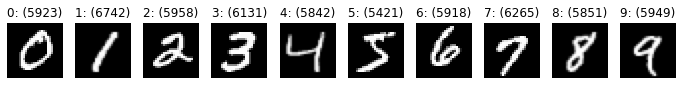

In [4]:
# Show an example of each label and print the count per label
# Plot first image of each label
unique_labels = set(y_train)
plt.figure(figsize=(12, 12))

i = 1
for label in unique_labels:
    image = X_train[y_train.tolist().index(label)]
    plt.subplot(10, 10, i)
    plt.axis('off')
    plt.title("{0}: ({1})".format(label, y_train.tolist().count(label)))
    i += 1
    _ = plt.imshow(image, cmap='gray')
plt.show()

In [9]:
print(X_val)
print(y_val)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
[7 2 1 ... 4 5 6]


In [10]:
# Preprocess the data
# Normalize data
X_train = X_train.astype('float32')/255.
X_val = X_val.astype('float32')/255.

In [11]:
X_val

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [12]:
# One-Hot-Encode labels
n_classes = 10
y_train = to_categorical(y_train, n_classes)
y_val = to_categorical(y_val, n_classes)

In [14]:
print(y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [15]:
# Flatten data - we treat the image as a sequential array of values
X_train = np.reshape(X_train, (60000, 784))
X_val = np.reshape(X_val, (10000, 784))

In [17]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [21]:
# Define the model with the sigmoid activation function

model_sigmoid = Sequential()
model_sigmoid.add(Dense(700, input_dim=784, activation='sigmoid'))
model_sigmoid.add(Dense(700, activation='sigmoid'))
model_sigmoid.add(Dense(700, activation='sigmoid'))
model_sigmoid.add(Dense(700, activation='sigmoid'))
model_sigmoid.add(Dense(700, activation='sigmoid')) 
model_sigmoid.add(Dense(350, activation='sigmoid')) 
model_sigmoid.add(Dense(100, activation='sigmoid')) 
model_sigmoid.add(Dense(10, activation='softmax'))

# Compile model with SGD
model_sigmoid.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [22]:
# Define the model with the ReLU activation function

model_relu = Sequential()
model_relu.add(Dense(700, input_dim=784, activation='relu'))
model_relu.add(Dense(700, activation='relu'))
model_relu.add(Dense(700, activation='relu'))
model_relu.add(Dense(700, activation='relu'))
model_relu.add(Dense(700, activation='relu')) 
model_relu.add(Dense(350, activation='relu')) 
model_relu.add(Dense(100, activation='relu')) 
model_relu.add(Dense(10, activation='softmax'))

# Compile model with SGD
model_relu.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [23]:
# Create a callback function to store the loss values per batch

class history_loss(Callback):
    def on_train_begin(self, logs={}):
        self.losses = []

    def on_batch_end(self, batch, logs={}):
        batch_loss = logs.get('loss')
        self.losses.append(batch_loss)

In [24]:
n_epochs = 10
batch_size = 256
validation_split = 0.2

history_sigmoid = history_loss()
model_sigmoid.fit(X_train, y_train, epochs=n_epochs, batch_size=batch_size,
 callbacks=[history_sigmoid],
 validation_split=validation_split, verbose=2)

Epoch 1/10
188/188 - 8s - loss: 2.3263 - accuracy: 0.1107 - val_loss: 2.3025 - val_accuracy: 0.1060 - 8s/epoch - 40ms/step
Epoch 2/10
188/188 - 6s - loss: 2.3015 - accuracy: 0.1140 - val_loss: 2.3031 - val_accuracy: 0.1060 - 6s/epoch - 32ms/step
Epoch 3/10
188/188 - 6s - loss: 2.3013 - accuracy: 0.1138 - val_loss: 2.3022 - val_accuracy: 0.1060 - 6s/epoch - 33ms/step
Epoch 4/10
188/188 - 7s - loss: 2.3014 - accuracy: 0.1140 - val_loss: 2.3021 - val_accuracy: 0.1060 - 7s/epoch - 36ms/step
Epoch 5/10
188/188 - 7s - loss: 2.3014 - accuracy: 0.1140 - val_loss: 2.3019 - val_accuracy: 0.1060 - 7s/epoch - 37ms/step
Epoch 6/10
188/188 - 7s - loss: 2.3013 - accuracy: 0.1133 - val_loss: 2.3025 - val_accuracy: 0.1060 - 7s/epoch - 36ms/step
Epoch 7/10
188/188 - 7s - loss: 2.3014 - accuracy: 0.1140 - val_loss: 2.3024 - val_accuracy: 0.1060 - 7s/epoch - 37ms/step
Epoch 8/10
188/188 - 7s - loss: 2.3015 - accuracy: 0.1140 - val_loss: 2.3020 - val_accuracy: 0.1060 - 7s/epoch - 36ms/step
Epoch 9/10
188/1

In [25]:
history_relu = history_loss()
model_relu.fit(X_train, y_train, epochs=n_epochs, batch_size=batch_size,
 callbacks=[history_relu],
 validation_split=validation_split, verbose=2)

Epoch 1/10
188/188 - 6s - loss: 2.1943 - accuracy: 0.3743 - val_loss: 1.9558 - val_accuracy: 0.6586 - 6s/epoch - 32ms/step
Epoch 2/10
188/188 - 6s - loss: 1.2665 - accuracy: 0.7271 - val_loss: 0.6939 - val_accuracy: 0.8054 - 6s/epoch - 34ms/step
Epoch 3/10
188/188 - 7s - loss: 0.5687 - accuracy: 0.8340 - val_loss: 0.4863 - val_accuracy: 0.8581 - 7s/epoch - 36ms/step
Epoch 4/10
188/188 - 7s - loss: 0.4149 - accuracy: 0.8801 - val_loss: 0.3435 - val_accuracy: 0.9028 - 7s/epoch - 36ms/step
Epoch 5/10
188/188 - 7s - loss: 0.3441 - accuracy: 0.9004 - val_loss: 0.3106 - val_accuracy: 0.9113 - 7s/epoch - 37ms/step
Epoch 6/10
188/188 - 6s - loss: 0.3001 - accuracy: 0.9117 - val_loss: 0.2753 - val_accuracy: 0.9205 - 6s/epoch - 34ms/step
Epoch 7/10
188/188 - 7s - loss: 0.2722 - accuracy: 0.9203 - val_loss: 0.2830 - val_accuracy: 0.9125 - 7s/epoch - 36ms/step
Epoch 8/10
188/188 - 7s - loss: 0.2479 - accuracy: 0.9276 - val_loss: 0.2323 - val_accuracy: 0.9328 - 7s/epoch - 36ms/step
Epoch 9/10
188/1

In [30]:
np.arange(len(history_sigmoid.losses))
print(history_sigmoid.losses)

[2.6210203170776367, 2.5942976474761963, 2.6057965755462646, 2.574885845184326, 2.5738797187805176, 2.555206775665283, 2.5534329414367676, 2.5391054153442383, 2.534047842025757, 2.527390718460083, 2.523709297180176, 2.522097587585449, 2.518706798553467, 2.5143024921417236, 2.5037379264831543, 2.497654914855957, 2.492823839187622, 2.485025644302368, 2.477459669113159, 2.471857786178589, 2.4663944244384766, 2.4599320888519287, 2.456411838531494, 2.454061269760132, 2.4513657093048096, 2.4500467777252197, 2.4458372592926025, 2.441748857498169, 2.438324451446533, 2.43487548828125, 2.4319980144500732, 2.4290199279785156, 2.4266903400421143, 2.423189163208008, 2.421160936355591, 2.41867733001709, 2.4172444343566895, 2.4149837493896484, 2.412597179412842, 2.4100708961486816, 2.4080872535705566, 2.4058358669281006, 2.403578281402588, 2.402052164077759, 2.400322675704956, 2.398632764816284, 2.396733283996582, 2.394820213317871, 2.393251895904541, 2.3916146755218506, 2.3903632164001465, 2.3885984

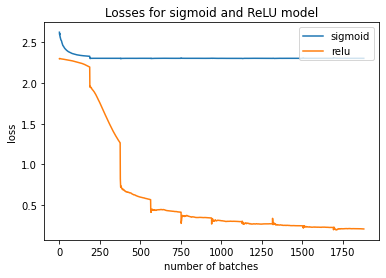

In [32]:
plt.plot(np.arange(len(history_sigmoid.losses)), history_sigmoid.losses, label='sigmoid')
plt.plot(np.arange(len(history_relu.losses)), history_relu.losses, label='relu')
plt.title('Losses for sigmoid and ReLU model')
plt.xlabel('number of batches')
plt.ylabel('loss')
plt.legend(loc=1)
plt.show()

# Losses for sigmoid and ReLU model

In [33]:
# Extract the maximum weights of each model per layer

w_sigmoid = []
w_relu = []
for i in range(len(model_sigmoid.layers)):
    w_sigmoid.append(max(model_sigmoid.layers[i].get_weights()[1]))
    w_relu.append(max(model_relu.layers[i].get_weights()[1]))

In [34]:
print(w_sigmoid)
print(w_relu)

[1.4153968e-06, 3.0069175e-06, 1.1379353e-05, 4.9534494e-05, 0.00024916205, 0.00094453635, 0.0064326264, 0.031114971]
[0.019275943, 0.02044048, 0.020353308, 0.020843271, 0.025935387, 0.033438668, 0.04340636, 0.10810467]


In [37]:
print(len(model_sigmoid.layers))

8


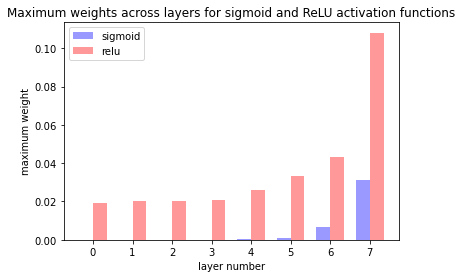

In [35]:
# Plot the weights of both models

fig, ax = plt.subplots()

index = np.arange(len(model_sigmoid.layers))
bar_width = 0.35

plt.bar(index, w_sigmoid, bar_width, label='sigmoid', color='b', alpha=0.4)
plt.bar(index + bar_width, w_relu, bar_width, label='relu', color='r', alpha=0.4)
plt.title('Maximum weights across layers for sigmoid and ReLU activation functions')
plt.xlabel('layer number')
plt.ylabel('maximum weight')
plt.legend(loc=0)

plt.xticks(index + bar_width / 2, np.arange(8))
plt.show()